In [45]:
import os
import csv
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt

In [46]:
N = 3
folder = f'N={N} (V large)'
optimizer = 'COBYLA'
path = f'results_{optimizer}'

In [47]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

In [48]:
files = [file for file in os.listdir(folder) if file == 'exact_solution.csv']
for i, file in enumerate(files):
    V_0  = []
    energy = []

    with open(f'{folder}/{file}', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)

        for row in reader:
            V_0.append(float(row[0]))
            energy.append(float(row[1]))

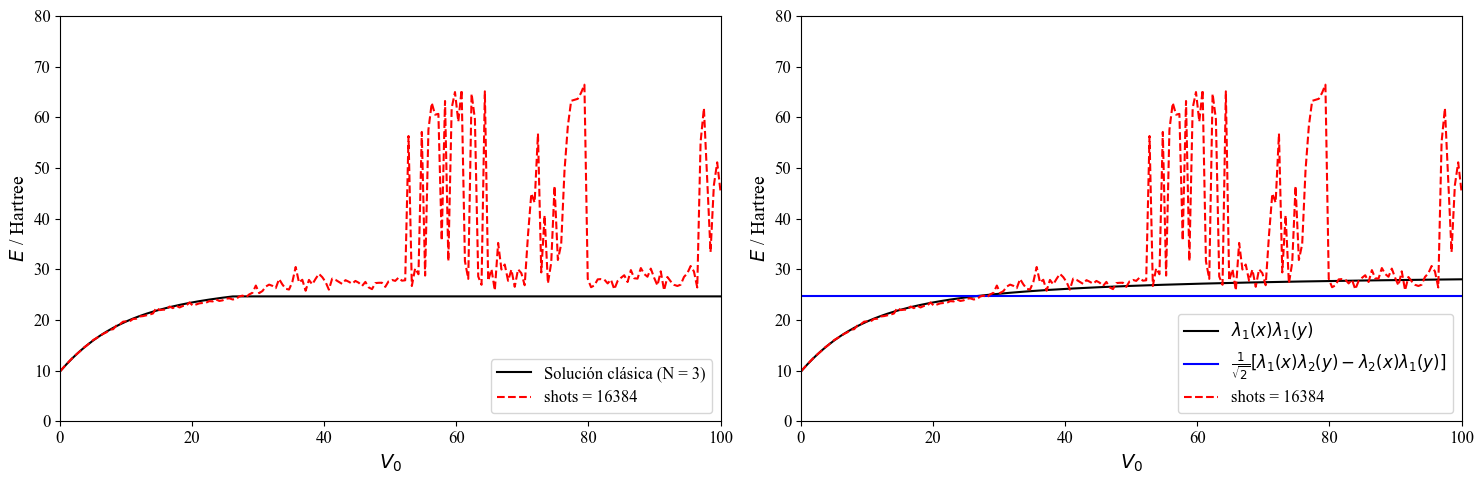

In [49]:
colors = ['red', '#0027FF', 'green', 'purple']
lines = ['--', ':', '-.', (0, (3, 5, 1, 5, 1, 5))]

rows = 1
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 5))

if os.path.exists(f'{folder}/{path}'):
    files = [file for file in os.listdir(f'{folder}/{path}') if file.endswith('.csv')]
    files = sorted(files, key=ordenar_por_numero)

    for i, file in enumerate(files):
        shots = int(file.split('=')[1].split('.')[0])

        V_0  = []
        energy_vqe = []

        with open(f'{folder}/{path}/{file}', newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)

            for row in reader:
                V_0.append(float(row[0]))
                energy_vqe.append(float(row[1]))


        row = i // columns
        column = i % columns

        if i == 0:
            axs[column].plot(V_0, energy, color='black', marker='', linestyle='-', label=f'Solución clásica (N = {N})')

        axs[column].plot(V_0, energy_vqe, color=colors[i], marker='', linestyle=lines[i], label=f'shots = {shots}')
        # axs[column].set_title(f'$shots = {shots}$', fontsize=16)
        axs[column].set_xlabel('$V_0$', fontsize=14)
        axs[column].set_ylabel('$E$ / Hartree', fontsize=14)
        axs[column].grid(False)
        axs[column].legend(loc='lower right')
        axs[column].set_xlim(0, 100)
        axs[column].set_ylim(0, 80)

        df = pd.read_csv(f'{folder}/exact_solution_saturation.csv')
        energy = df['energy_0'].to_list()
        axs[1].plot(V_0, energy, color='black', label=r'$\lambda_1(x) \lambda_1(y)$')
        if N == 2:
            energy = df['energy_2'].to_list()
        if N == 3:
            energy = df['energy_3'].to_list()
        axs[1].plot(V_0, energy, color='blue', label=r'$\frac{1}{\sqrt{2}} \left[\lambda_1(x) \lambda_2(y) - \lambda_2(x) \lambda_1(y)\right]$')
        axs[1].plot(V_0, energy_vqe, color=colors[i], marker='', linestyle=lines[i], label=f'shots = {shots}')
        axs[1].set_xlabel('$V_0$', fontsize=14)
        axs[1].set_ylabel('$E$ / Hartree', fontsize=14)
        axs[1].grid(False)
        axs[1].legend(loc='lower right')
        axs[1].set_xlim(0, 100)
        axs[1].set_ylim(0, 80)
    

plt.tight_layout()
plt.savefig(f'potential_well_aer_COBYLA_{folder}_plot.png')
plt.savefig(f'../../../TFG/Figuras/potential_well_aer_COBYLA_{folder}_plot.png')
plt.show()